<center> <h1 style="color:#0000CD">Proyecto Final Curso Machine Learning</h1> </center>
<center> <h5>Universidad Castro Carazo</h5>
<center> <h6>2C - 2023</h6> </center>
</br>

<p>El presente documento contempla un analisis de sobre el data frame del Banco Uno y la posiblidad de aplicar un proceso de Machine Learning sobre este set de datos.</p>

<p>Estudiante: Daihan Herrera Monge.</p>
                                                                                                    
</div>

</body>
</html>

<img src="biuwer_6_business_machine_learning_use_cases_4dba3d6e91.jpg"/>

<h2 Style = "color:#641E16"> 1. Llamar Librerias </h2>

In [1]:
from sqlalchemy import create_engine
import pymysql
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
#llama la informacion de la data a trabajar --> stream de conexión 

connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit', 
charset='utf8mb4', # solicita la informacion en el formato X en este caso en --> UTF-8 latino
cursorclass=pymysql.cursors.DictCursor) #indica a que base de datos apunta sql en este caso

In [3]:
# crear el df donde se guarda la informacion a partir de una libreria de sql lenguaje estrucutrado 

df = pd.read_sql('SELECT * FROM credit', con= connection) #indica que se debe seleccinar de la db el * indica todo el con significa considerar y considera sobre x cadena de conexion

In [4]:
#guardar el csv
df. to_csv( "BancoUno.csv", header = False , index = False )

In [5]:
credit = df # se renombra el dataframe como credit

In [6]:
credit.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


<h2 Style = "color:#641E16"> 2.Generalidades de la base de datos </h2>

In [7]:
credit.shape #muestra el numero de registros en filas y columnas de la base de datos

(3670, 24)

In [8]:
credit.tail(5) #muestra los ultimos elementros de una base de datos

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
3665,220000,female,university,1,32,0,0,0,0,0,...,208355,213015,217475,7200,9000,10000,8000,8010,8500,not default
3666,70000,female,university,2,34,1,2,2,2,0,...,26456,28361,31873,1500,2900,0,2500,4000,0,not default
3667,120000,male,university,2,37,-1,2,0,0,0,...,17901,19608,19143,1000,1600,800,2000,0,1600,default
3668,180000,female,university,2,32,0,0,0,0,0,...,31057,29052,25933,1582,30000,1000,1000,1000,1000,not default
3669,50000,female,high school,1,57,0,0,0,0,0,...,48319,48449,49656,2500,2000,2000,1746,2000,1800,not default


In [9]:
credit.describe() #genera estadisticas descriptivas de la base de datos

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,3670,3670,3670,3670,3670,3670,3670,3670,3670,3670,...,3670,3670,3670,3670,3670,3670,3670,3670,3670,3670
unique,63,3,5,5,53,10,11,11,10,9,...,2009,1984,1948,1147,1130,1041,1035,1039,971,3
top,50000,female,university,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,453,2130,1644,2045,214,1741,1901,1875,1995,1996,...,424,460,532,667,708,798,808,827,949,2873


<h2 Style = "color:#641E16"> 3. Cambio de nombre a columnas </h2>

In [10]:
#Para cambiar el nombre de una columna

credit.rename({"X1": "$Cred_Otrg"}, axis=1, inplace=True)
credit.rename({"X2": "Género"}, axis=1, inplace=True)
credit.rename({"X3": "Educacion"}, axis=1, inplace=True)
credit.rename({"X4": "Est_Civil"}, axis=1, inplace=True)
credit.rename({"X5": "Edad"}, axis=1, inplace=True)

credit.rename({"X6": "Remb_Set"}, axis=1, inplace=True)
credit.rename({"X7": "Remb_Ago"}, axis=1, inplace=True)
credit.rename({"X8": "Remb_Jul"}, axis=1, inplace=True)
credit.rename({"X9": "Remb_Jun"}, axis=1, inplace=True)
credit.rename({"X10": "Remb_May"}, axis=1, inplace=True)
credit.rename({"X11": "Remb_Abr"}, axis=1, inplace=True)

credit.rename({"X12": "Ext_Fact_Set"}, axis=1, inplace=True)
credit.rename({"X13": "Ext_Fact_Agos"}, axis=1, inplace=True)
credit.rename({"X14": "Ext_Fact_Jul"}, axis=1, inplace=True)
credit.rename({"X15": "Ext_Fact_Jun"}, axis=1, inplace=True)
credit.rename({"X16": "Ext_Fact_May"}, axis=1, inplace=True)
credit.rename({"X17": "Ext_Fact_Abr"}, axis=1, inplace=True)

credit.rename({"X18": "M_Pago_Set"}, axis=1, inplace=True)
credit.rename({"X19": "M_Pago_Agos"}, axis=1, inplace=True)
credit.rename({"X20": "M_Pago_Jul"}, axis=1, inplace=True)
credit.rename({"X21": "M_Pago_Jun"}, axis=1, inplace=True)
credit.rename({"X22": "M_Pago_May"}, axis=1, inplace=True)
credit.rename({"X23": "M_Pago_Abr"}, axis=1, inplace=True)

credit.rename({"Y": "Comp_Cliente"}, axis=1, inplace=True)

In [11]:
credit.head(5)

,$Cred_Otrg,Género,Educacion,Est_Civil,Edad,Remb_Set,Remb_Ago,Remb_Jul,Remb_Jun,Remb_May,...,Ext_Fact_Jun,Ext_Fact_May,Ext_Fact_Abr,M_Pago_Set,M_Pago_Agos,M_Pago_Jul,M_Pago_Jun,M_Pago_May,M_Pago_Abr,Comp_Cliente
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


<h2 Style = "color:#641E16"> 5. Pandas Profiling </h2>

In [12]:
import pandas_profiling

In [13]:
pandas_profiling.ProfileReport(credit) # solicita un reporte estadistico de la base de datos

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h2 Style = "color:#641E16"> 6. Depuración de datos duplicados </h2>

In [14]:
credit = df.drop_duplicates() #Depura todos los datos duplicados

In [15]:
credit.drop([0], axis=0, inplace=True) #el codigo lo dejo asi de referencia para recordar como elimine la fila

In [16]:
credit.shape #muestra el numero de registros en filas y columnas de la base de datos

(2396, 24)

In [17]:
print(credit)

     $Cred_Otrg  Género    Educacion Est_Civil Edad Remb_Set Remb_Ago  \
1         20000  female   university         1   24        2        2   
2        120000  female   university         2   26       -1        2   
3         90000  female   university         2   34        0        0   
4         50000  female   university         1   37        0        0   
5         50000    male   university         1   57       -1        0   
...         ...     ...          ...       ...  ...      ...      ...   
2393      50000    male  high school         1   32        2        3   
2394      20000  female  high school         2   49        0        0   
2395     130000  female   university         2   24        1       -2   
2396     110000  female  high school         1   27        0        0   
2397     200000    male   university         1   29        0        0   

     Remb_Jul Remb_Jun Remb_May  ... Ext_Fact_Jun Ext_Fact_May Ext_Fact_Abr  \
1          -1       -1       -2  ...        

<h2 Style = "color:#641E16"> 7. Información tipo de campo </h2>

In [18]:
credit.info() # dtypyes --> Permite saber que tipo de campo tiene cada columna si es int, obj, float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2397
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   $Cred_Otrg     2396 non-null   object
 1   Género         2396 non-null   object
 2   Educacion      2396 non-null   object
 3   Est_Civil      2396 non-null   object
 4   Edad           2396 non-null   object
 5   Remb_Set       2396 non-null   object
 6   Remb_Ago       2396 non-null   object
 7   Remb_Jul       2396 non-null   object
 8   Remb_Jun       2396 non-null   object
 9   Remb_May       2396 non-null   object
 10  Remb_Abr       2396 non-null   object
 11  Ext_Fact_Set   2396 non-null   object
 12  Ext_Fact_Agos  2396 non-null   object
 13  Ext_Fact_Jul   2396 non-null   object
 14  Ext_Fact_Jun   2396 non-null   object
 15  Ext_Fact_May   2396 non-null   object
 16  Ext_Fact_Abr   2396 non-null   object
 17  M_Pago_Set     2396 non-null   object
 18  M_Pago_Agos    2396 non-null

In [19]:
#cambio de tipo de campo
credit[["Edad","$Cred_Otrg","Est_Civil","Remb_Set","Remb_Ago","Remb_Jul","Remb_Jun","Remb_May","Remb_Abr","Ext_Fact_Set","Ext_Fact_Agos","Ext_Fact_Jul","Ext_Fact_Jun","Ext_Fact_May","Ext_Fact_Abr","M_Pago_Set","M_Pago_Agos","M_Pago_Jul","M_Pago_Jun","M_Pago_May","M_Pago_Abr"]] = credit[["Edad","$Cred_Otrg","Est_Civil","Remb_Set","Remb_Ago","Remb_Jul","Remb_Jun","Remb_May","Remb_Abr","Ext_Fact_Set","Ext_Fact_Agos","Ext_Fact_Jul","Ext_Fact_Jun","Ext_Fact_May","Ext_Fact_Abr","M_Pago_Set","M_Pago_Agos","M_Pago_Jul","M_Pago_Jun","M_Pago_May","M_Pago_Abr"]].astype("int")

In [20]:
credit.dtypes

$Cred_Otrg        int32
Género           object
Educacion        object
Est_Civil         int32
Edad              int32
Remb_Set          int32
Remb_Ago          int32
Remb_Jul          int32
Remb_Jun          int32
Remb_May          int32
Remb_Abr          int32
Ext_Fact_Set      int32
Ext_Fact_Agos     int32
Ext_Fact_Jul      int32
Ext_Fact_Jun      int32
Ext_Fact_May      int32
Ext_Fact_Abr      int32
M_Pago_Set        int32
M_Pago_Agos       int32
M_Pago_Jul        int32
M_Pago_Jun        int32
M_Pago_May        int32
M_Pago_Abr        int32
Comp_Cliente     object
dtype: object

<h4 Style = "color:#BB35AE"> Nota 1: Trabajando con datos no numéricos (One-Hot Encoding) </h4>

In [21]:
#Esta linea tiene el codigo que permite pasar datos categoricos a un valor numerico convirtiendolo a datos numeros binarios 1 y 0

#la generación de las variables dummyes, esto permitirá convertir los datos no numericos a numericos

#credit = pd.get_dummies(credit) 

<h2 Style = "color:#641E16"> 8. Ejecución de Graficos </h2>

In [22]:
#llamar libreria para diseño de graficas matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot # para etiquetas del grafico

In [23]:
#verifica nombre de columnas para generar la grafica
header = credit.dtypes.index
print(header)

Index(['$Cred_Otrg', 'Género', 'Educacion', 'Est_Civil', 'Edad', 'Remb_Set',
       'Remb_Ago', 'Remb_Jul', 'Remb_Jun', 'Remb_May', 'Remb_Abr',
       'Ext_Fact_Set', 'Ext_Fact_Agos', 'Ext_Fact_Jul', 'Ext_Fact_Jun',
       'Ext_Fact_May', 'Ext_Fact_Abr', 'M_Pago_Set', 'M_Pago_Agos',
       'M_Pago_Jul', 'M_Pago_Jun', 'M_Pago_May', 'M_Pago_Abr', 'Comp_Cliente'],
      dtype='object')


In [24]:
credit.describe()

,$Cred_Otrg,Est_Civil,Edad,Remb_Set,Remb_Ago,Remb_Jul,Remb_Jun,Remb_May,Remb_Abr,Ext_Fact_Set,...,Ext_Fact_Jul,Ext_Fact_Jun,Ext_Fact_May,Ext_Fact_Abr,M_Pago_Set,M_Pago_Agos,M_Pago_Jul,M_Pago_Jun,M_Pago_May,M_Pago_Abr
count,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,...,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000
mean,165834.724541,1.580134,35.419866,0.004591,-0.136477,-0.151920,-0.249165,-0.259599,-0.282137,51199.401085,...,45511.918614,41544.281302,39992.825125,38797.298414,5548.942821,5220.050501,4855.443656,4891.429883,4984.977880,5149.928631
std,129493.683277,0.525593,9.452344,1.123473,1.207902,1.247411,1.176359,1.156723,1.181852,77872.623393,...,69632.762068,68117.135902,64327.134703,65468.199929,13701.948666,14616.927369,22156.285391,14252.068389,16896.223773,20076.659470
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,...,-9850.000000,-7905.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3125.000000,...,2296.750000,1856.000000,1524.000000,1012.000000,997.500000,588.000000,247.750000,240.000000,247.750000,0.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21111.500000,...,19468.500000,17918.500000,17588.500000,15819.500000,2117.500000,2000.000000,1443.000000,1500.000000,1500.000000,1328.000000
75%,230000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62921.250000,...,56221.750000,49304.000000,48517.750000,47369.500000,5002.250000,4921.750000,4000.000000,4000.000000,4000.000000,4000.000000
max,1000000.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,964511.000000,...,548020.000000,891586.000000,927171.000000,961664.000000,239104.000000,285138.000000,896040.000000,205000.000000,332000.000000,528666.000000


<h2 Style = "color:#641E16"> 8.1. Creación de BINS </h2>

In [25]:
#creacion de bins
import numpy as np
bins = np.linspace(21,75,12)
bins

array([21.        , 25.90909091, 30.81818182, 35.72727273, 40.63636364,
       45.54545455, 50.45454545, 55.36363636, 60.27272727, 65.18181818,
       70.09090909, 75.        ])

In [26]:
#creacion de grupos de bins para graficar
groupNames = ["21-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60-65","65,70","70-75"]
credit["Edad"] = pd.cut(credit["Edad"],bins, labels=groupNames, include_lowest=True)

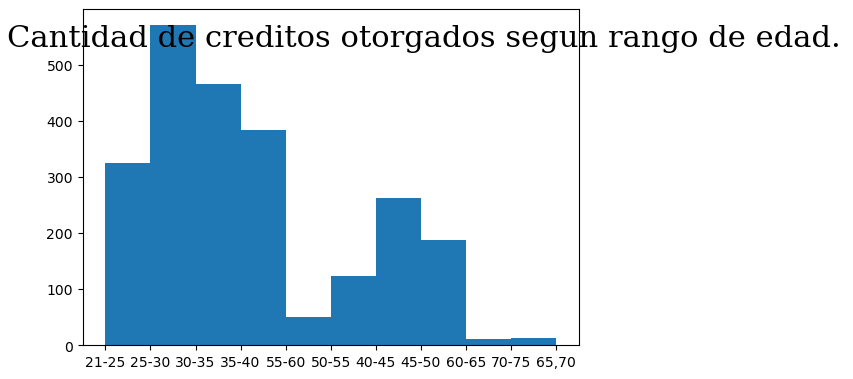

In [27]:
#Generar grafica de histograma # esta linea es necesaria para que muestre el grafico

#Esta linea da los tamaños, centra el grafico
fig,ax=plt.subplots(1,1,figsize=(8,4.1),dpi=90)

%matplotlib inline 
plt.hist(credit["Edad"]) #bins define el numero de barras que se quieren mostrar

#Formato del grafico
#-------Titulo y Subtitulo del grafico
title_t = "Figura 1: Cantidad de Creditos"
ax.set_title(title_t,
             horizontalalignment = 'left',
             x=0.01,
             y=0.96,
             transform=fig.transFigure,
             fontsize=24,
             fontweight="bold",
             fontfamily="serif")

subtitle_t = 'Cantidad de creditos otorgados segun rango de edad.'
plt.suptitle(subtitle_t,
            horizontalalignment = "left",
            x = 0.01,
            y = 0.96,
            transform = fig.transFigure,
            fontsize=22,
            fontweight="regular",
            fontfamily="serif")
 
#-------Etiquetas en Eje X y Y
label = " Rango de Edad"
ax.set_xlabel(label,
             ha="left",
             fontsize=10,
             fontweight="regular",
             fontfamily="sans")
 
ax.xaxis.set_label_coords(x=0,
                          y=-0.010,
                          transform=ax.transAxes)
 
ax.tick_params(axis='both',
               labelsize=12)

plt.subplots_adjust(top=0.81)

plt.show()

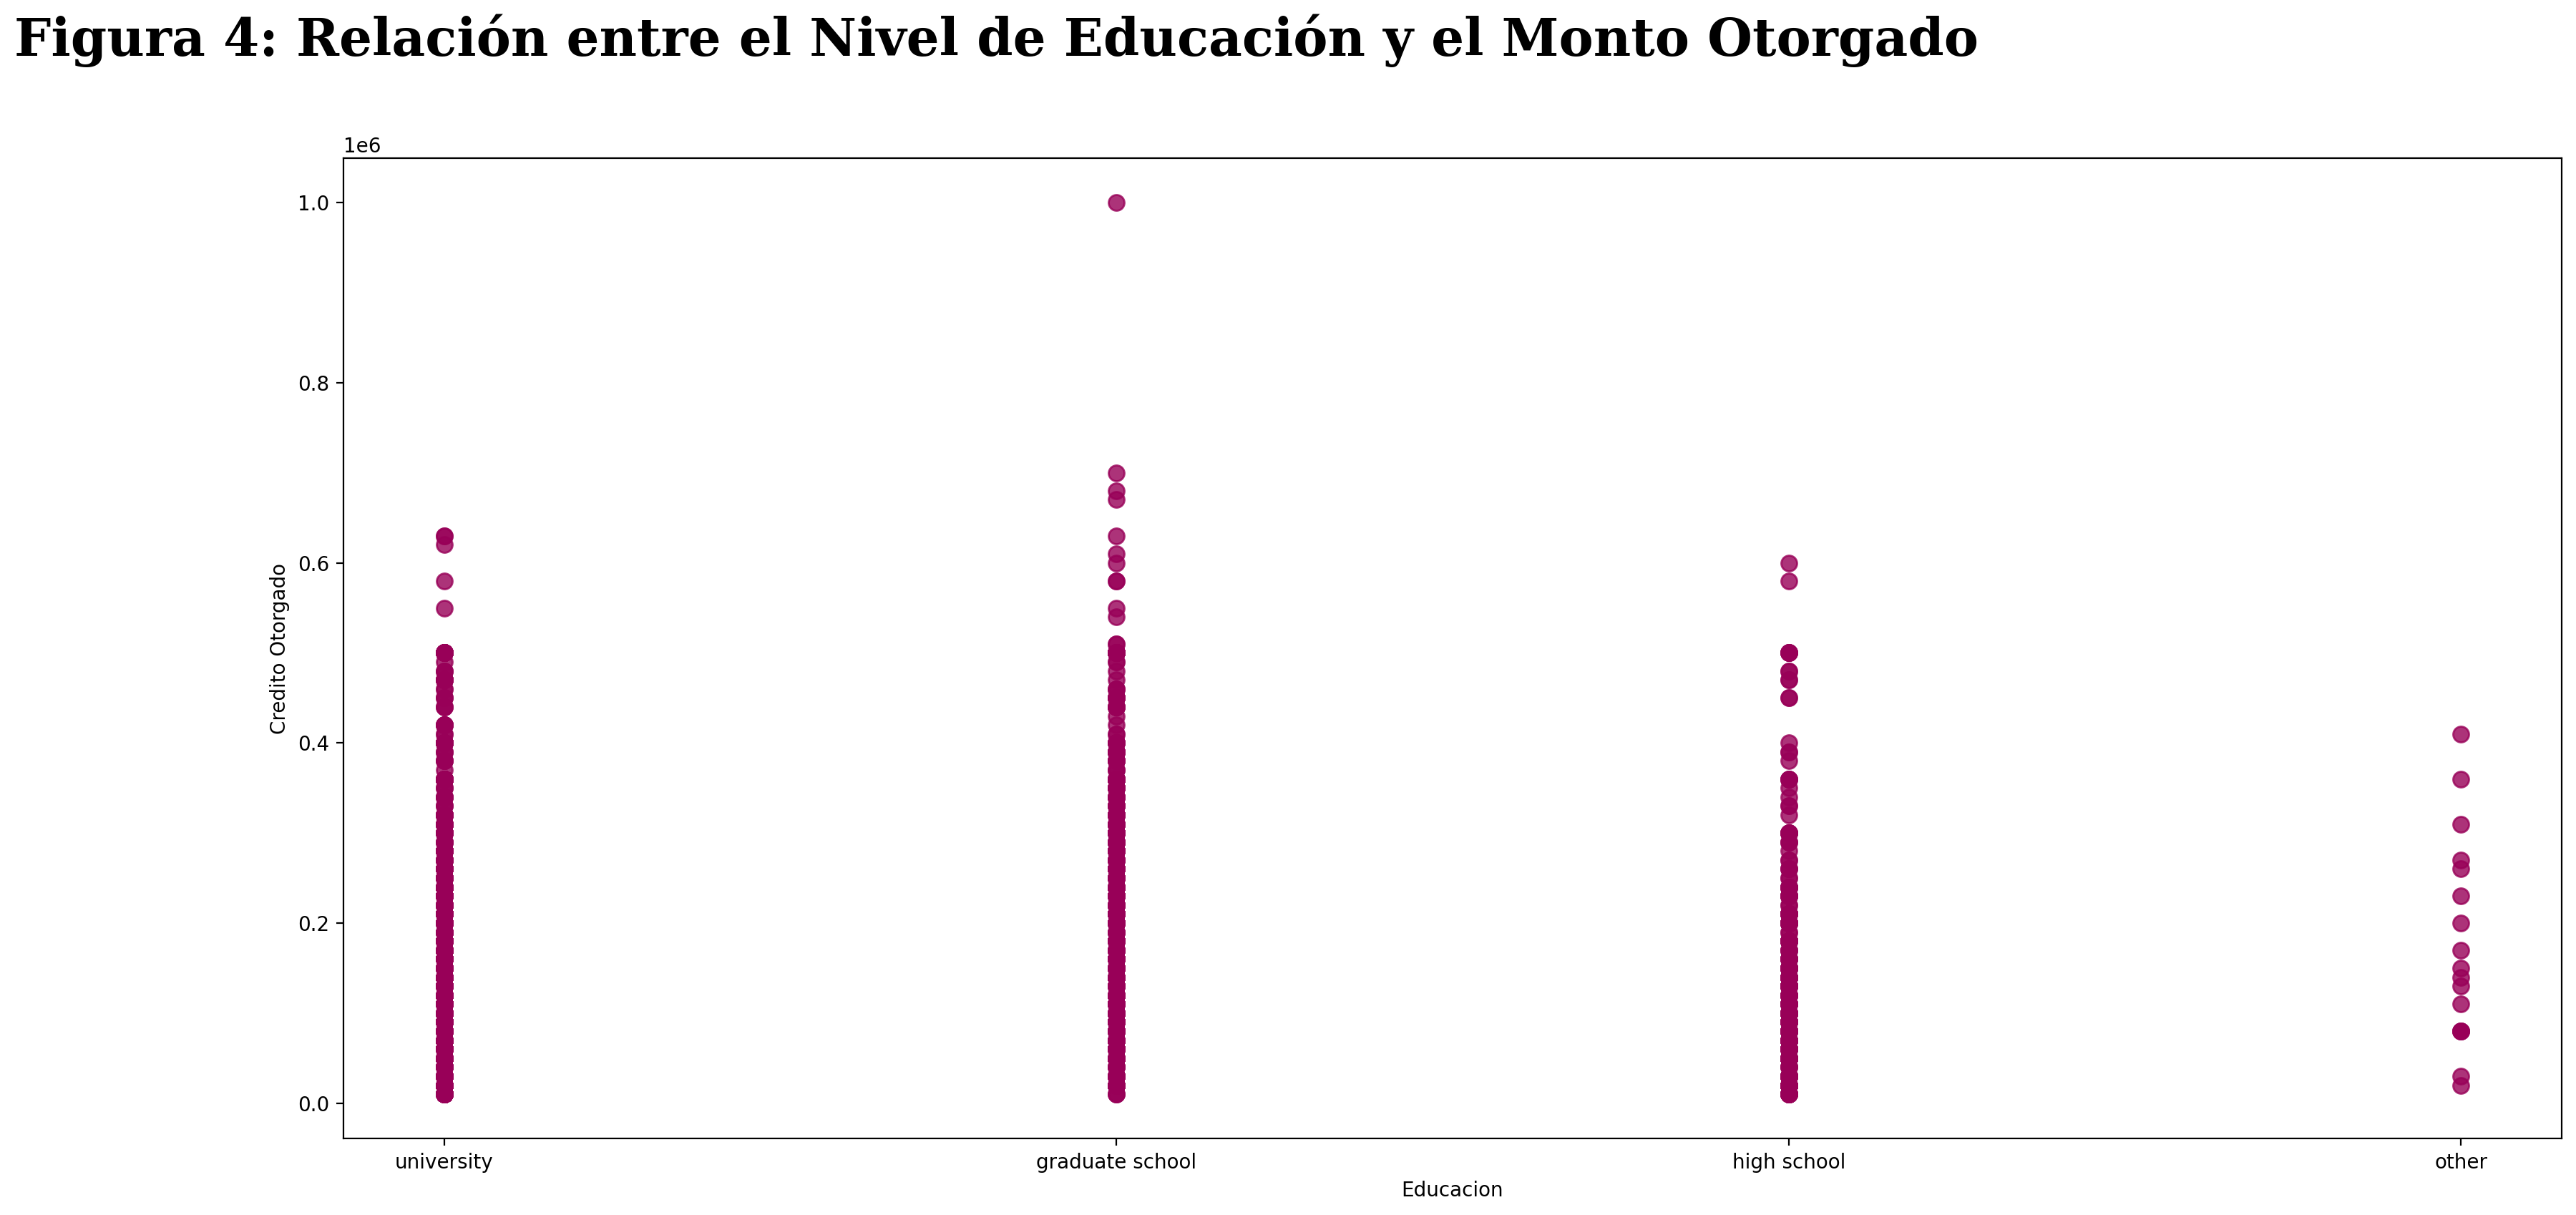

In [28]:
fig,ax=plt.subplots(1,1,figsize=(20,8.9),dpi=200)

plt.scatter(credit["Educacion"],credit["$Cred_Otrg"], c="#980058", s=250, alpha=0.8, marker=".", label="luck")
plt.xlabel("Educacion")
plt.ylabel("Credito Otorgado")
plt.title ="Figura 4: Relación entre el Nivel de Educación y el Monto Otorgado"

ax.set_title(plt.title,
             horizontalalignment = 'left',
             x=0.01,
             y=0.96,
             transform=fig.transFigure,
             fontsize=26,
             fontweight="bold",
             fontfamily="serif")
plt.show()

In [29]:
#Se agrupa y cuenta la cantidad de registros segun la marca
dfGraf = credit.groupby(["Est_Civil"]).count()
#Se selecciona unicamente el indice de la primera columna
dfGraf = dfGraf.iloc[:,:1]
#Se ordenan los datos de mayor a menor
dfGraf = dfGraf.sort_values("$Cred_Otrg", ascending = False)
#Se muestran los datos para graficar
dfGraf

,$Cred_Otrg
Est_Civil,
2,1330
1,1027
3,33
0,6


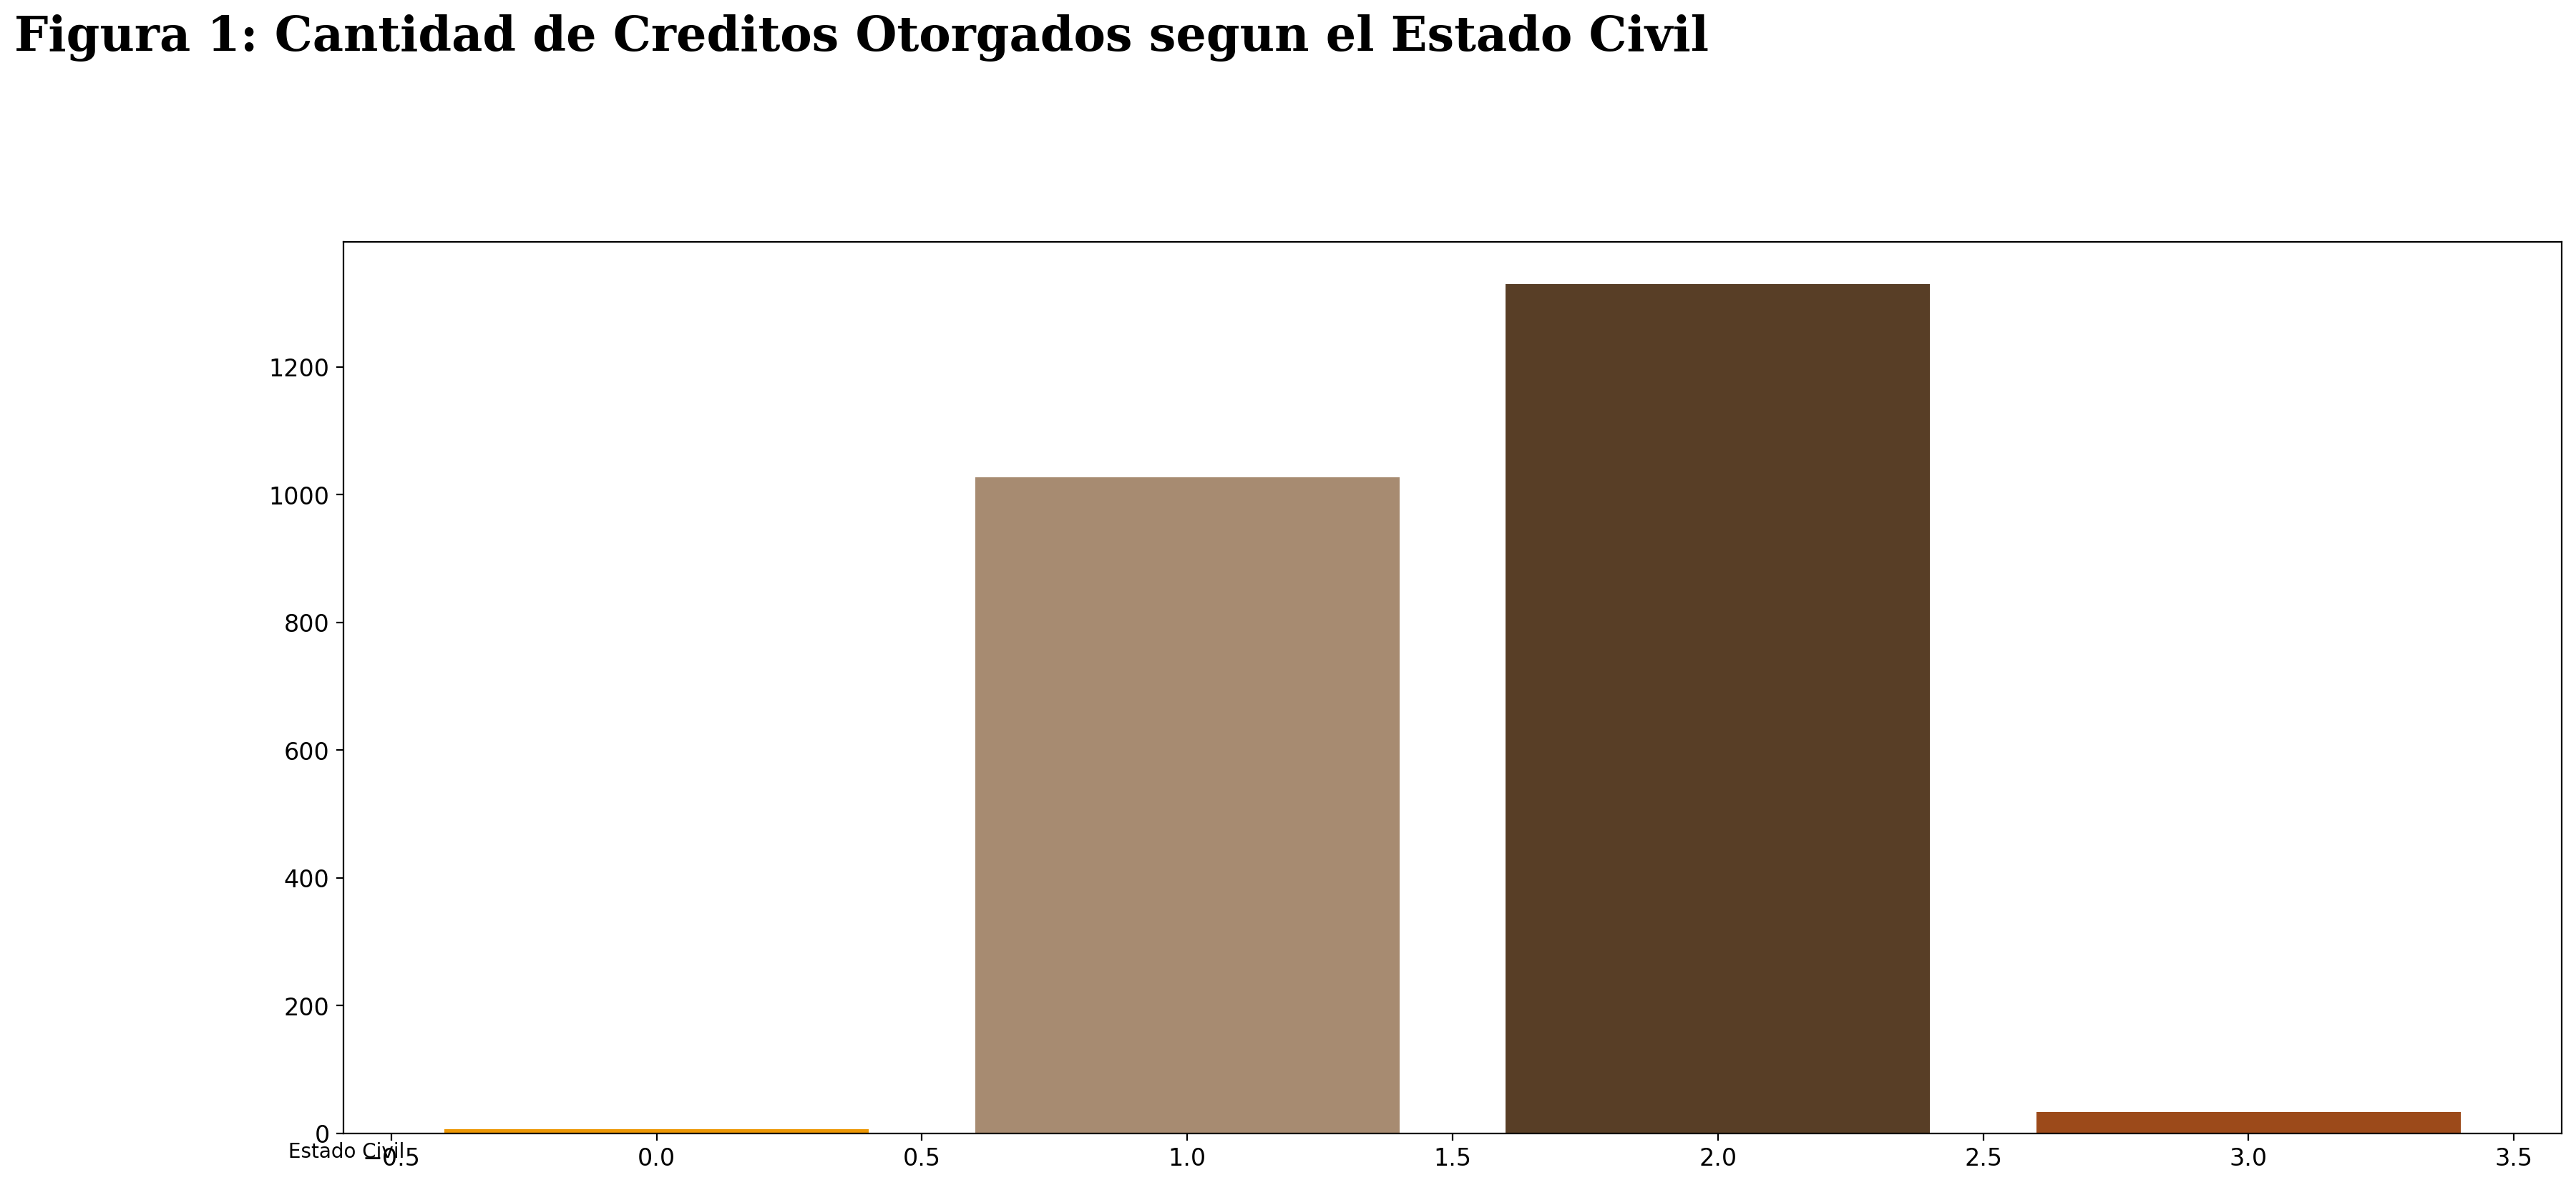

In [30]:
fig,ax=plt.subplots(1,1,figsize=(20,8.9),dpi=200)

eCivil= dfGraf.index.tolist() # se crea una variable nueva "eCivil" donde se agrupan los datos de la tabla anterior
counts = dfGraf["$Cred_Otrg"].tolist()
bar_colors = ["#583E26","#A78B71","#9C4A1A","#EC9704","#F7C815"]
ax.bar(eCivil,counts,label ="Estado_Civil",color=bar_colors)

#formato del grafico
#-------Titulo y Subtitulo del grafico
title_t = "Figura 1: Cantidad de Creditos Otorgados segun el Estado Civil"
ax.set_title(title_t,
             horizontalalignment = 'left',
             x=0.01,
             y=0.96,
             transform=fig.transFigure,
             fontsize=24,
             fontweight="bold",
             fontfamily="serif")


 
#-------Etiquetas en Eje X y Y
label = " Estado Civil"
ax.set_xlabel(label,
             ha="center",
             fontsize=10,
             fontweight="regular",
             fontfamily="sans")
 
ax.xaxis.set_label_coords(x=0,
                          y=-0.010,
                          transform=ax.transAxes)
 
ax.tick_params(axis='both',
               labelsize=12)

plt.subplots_adjust(top=0.81)

plt.show()


In [31]:
#Determinar la Covarianza: Mide el grado de lineal de cambio entre dos variables las variables que tengan una relacion alta debo eliminarlas
covMat = credit.cov()
print(covMat)

                 $Cred_Otrg     Est_Civil      Remb_Set      Remb_Ago  \
$Cred_Otrg     1.676861e+10 -10058.566644 -29175.023787 -38827.576232   
Est_Civil     -1.005857e+04      0.276248      0.015290      0.023676   
Remb_Set      -2.917502e+04      0.015290      1.262192      0.865345   
Remb_Ago      -3.882758e+04      0.023676      0.865345      1.459028   
Remb_Jul      -3.815289e+04      0.025540      0.767712      1.150865   
Remb_Jun      -3.417397e+04      0.028952      0.657512      0.948026   
Remb_May      -3.197111e+04      0.027074      0.614136      0.893157   
Remb_Abr      -3.227379e+04      0.025541      0.591692      0.866280   
Ext_Fact_Set   3.648630e+09  -1655.601465  15016.264546  21185.747455   
Ext_Fact_Agos  3.532902e+09  -1494.415030  14863.644606  20953.985093   
Ext_Fact_Jul   3.297613e+09  -1731.488883  13569.784507  19591.343794   
Ext_Fact_Jun   3.313588e+09  -1365.926518  13319.744428  18901.320245   
Ext_Fact_May   3.046906e+09  -1318.268027  13072.30

<h2 Style = "color:#641E16"> 9. Machine Learning </h2>

In [32]:
# Librerias a ser utilizadas para el modelo de Machine Learning

from sklearn import linear_model #para aplicar regresiones lineales
from sklearn.preprocessing import StandardScaler # para estadarizar valores
from sklearn.decomposition import PCA #para implementar el PCA

<h3 Style = "color:#264301"> 9.1. Matriz de Correlación de Pearson </h3>

In [33]:
#Se ejecuta primero la correlacion tabulada
corr=credit.corr()
print(corr)

               $Cred_Otrg  Est_Civil  Remb_Set  Remb_Ago  Remb_Jul  Remb_Jun  \
$Cred_Otrg       1.000000  -0.147788 -0.200540 -0.248233 -0.236194 -0.224340   
Est_Civil       -0.147788   1.000000  0.025893  0.037293  0.038955  0.046826   
Remb_Set        -0.200540   0.025893  1.000000  0.637668  0.547805  0.497509   
Remb_Ago        -0.248233   0.037293  0.637668  1.000000  0.763806  0.667189   
Remb_Jul        -0.236194   0.038955  0.547805  0.763806  1.000000  0.812452   
Remb_Jun        -0.224340   0.046826  0.497509  0.667189  0.812452  1.000000   
Remb_May        -0.213442   0.044533  0.472577  0.639244  0.724154  0.835864   
Remb_Abr        -0.210881   0.041117  0.445626  0.606825  0.669614  0.742573   
Ext_Fact_Set     0.361823  -0.040450  0.171638  0.225230  0.195056  0.200938   
Ext_Fact_Agos    0.361342  -0.037658  0.175226  0.229758  0.220140  0.221052   
Ext_Fact_Jul     0.365711  -0.047310  0.173459  0.232926  0.224046  0.253484   
Ext_Fact_Jun     0.375659  -0.038152  0.

<h3 Style = "color:#264301"> 9.2. Graficos de Correlación de Pearson </h3>

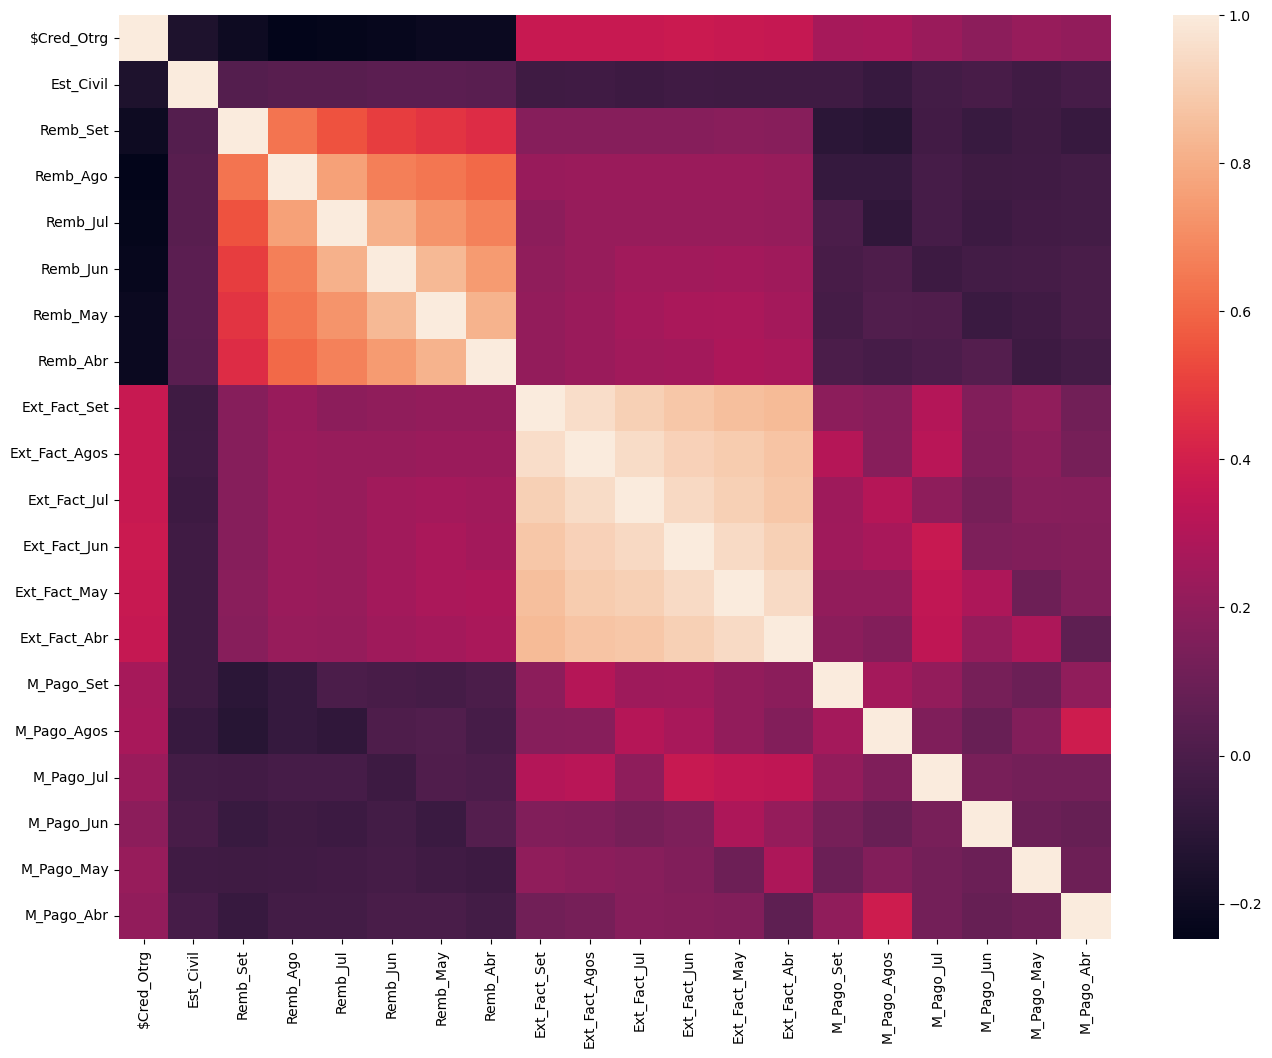

In [34]:
matrix = credit.corr()

plt.figure(figsize=(16,12))

corr_credit= sns.heatmap(matrix)

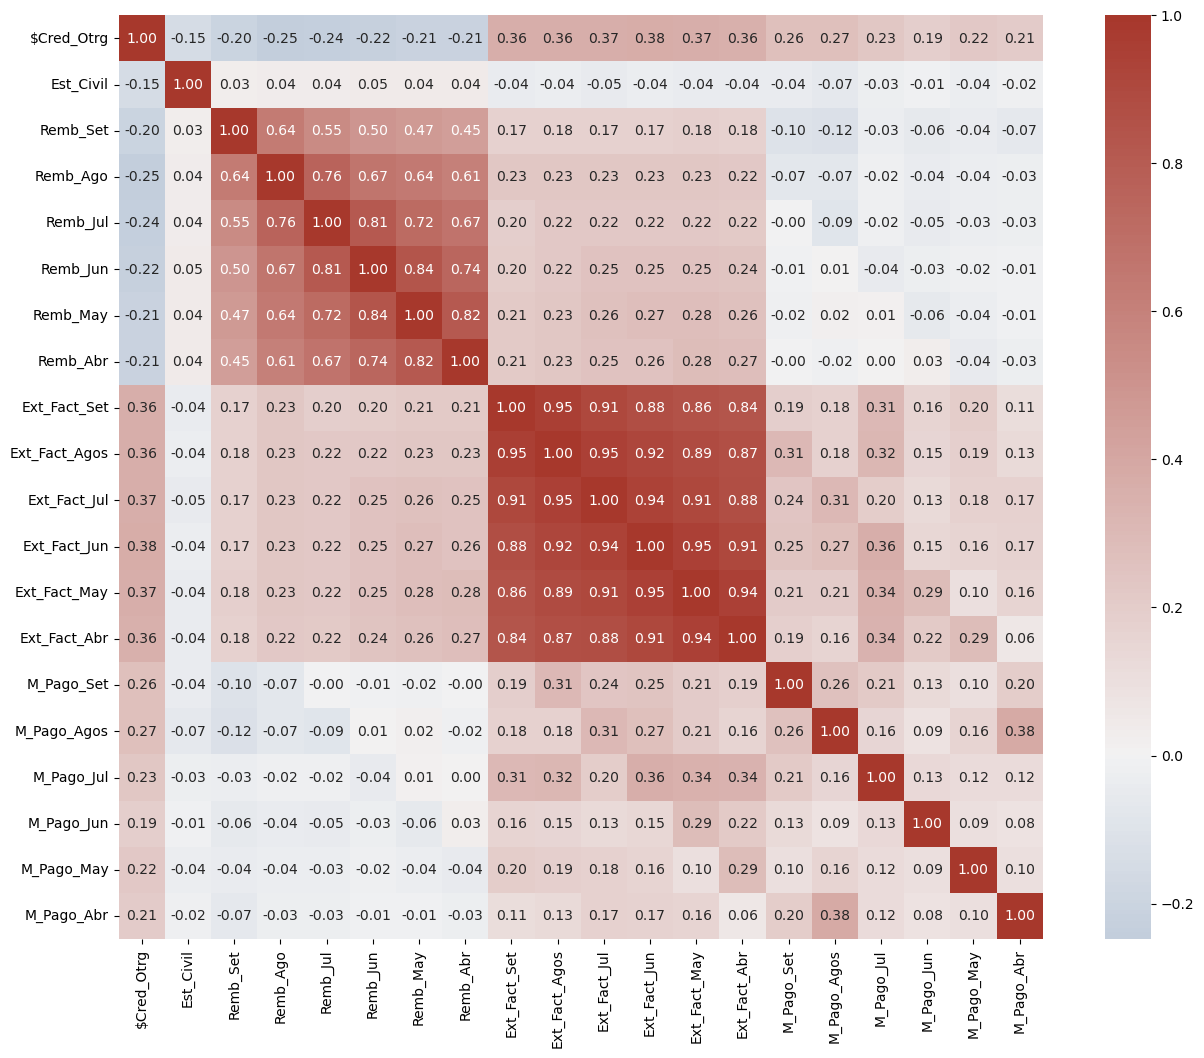

In [35]:
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)

<AxesSubplot: >

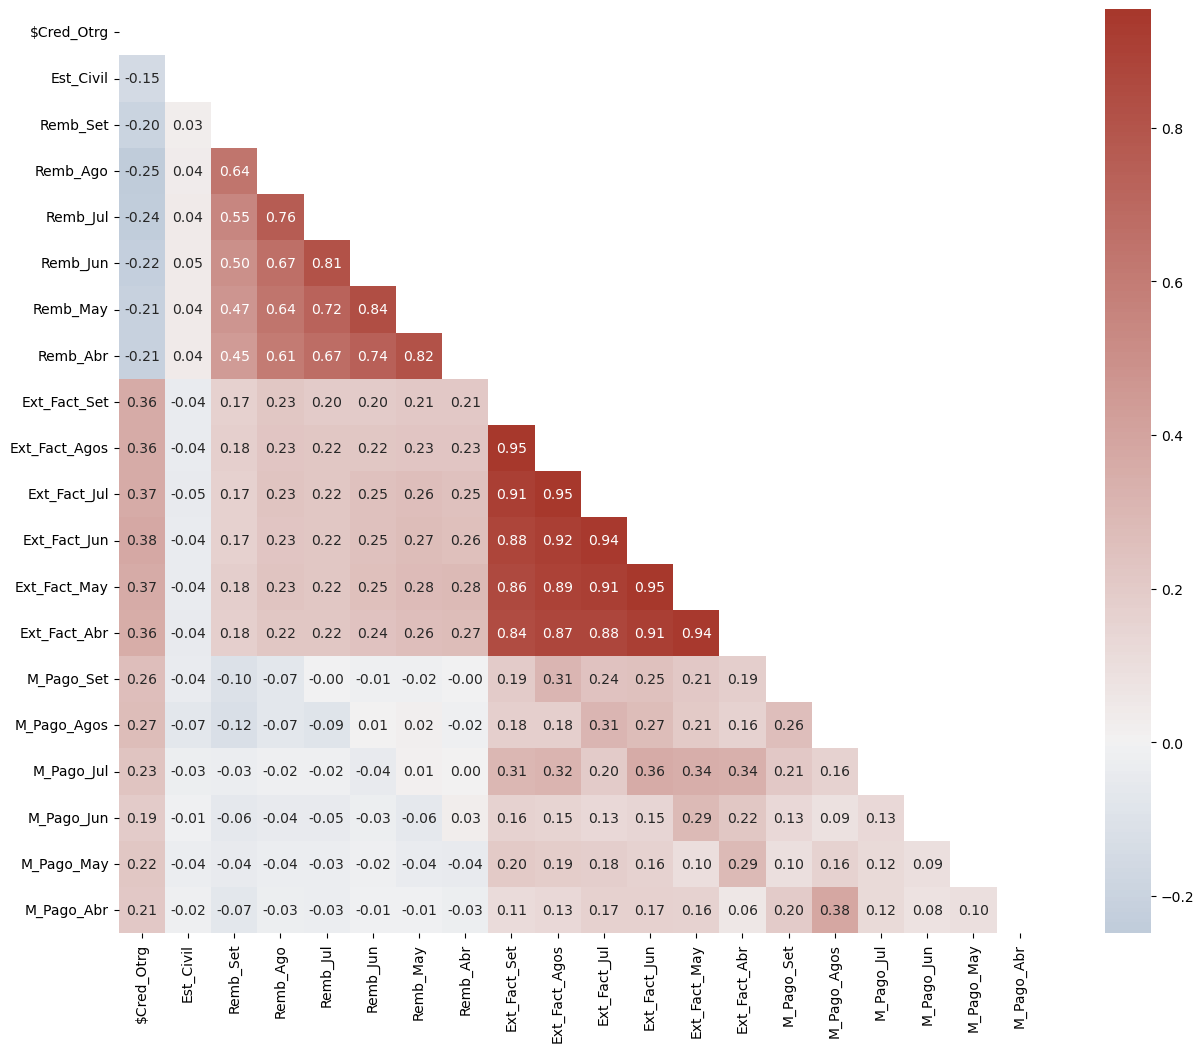

In [36]:
# Create a mask
plt.figure(figsize=(16,12))

mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

<h3 Style = "color:#264301"> 9.3. Reducción de caracteristicas </h3>

In [37]:
credit.columns

Index(['$Cred_Otrg', 'Género', 'Educacion', 'Est_Civil', 'Edad', 'Remb_Set',
       'Remb_Ago', 'Remb_Jul', 'Remb_Jun', 'Remb_May', 'Remb_Abr',
       'Ext_Fact_Set', 'Ext_Fact_Agos', 'Ext_Fact_Jul', 'Ext_Fact_Jun',
       'Ext_Fact_May', 'Ext_Fact_Abr', 'M_Pago_Set', 'M_Pago_Agos',
       'M_Pago_Jul', 'M_Pago_Jun', 'M_Pago_May', 'M_Pago_Abr', 'Comp_Cliente'],
      dtype='object')

In [38]:
credit = credit.rename(columns={'Comp_Cliente':'Y'})
credit.head(5)

,$Cred_Otrg,Género,Educacion,Est_Civil,Edad,Remb_Set,Remb_Ago,Remb_Jul,Remb_Jun,Remb_May,...,Ext_Fact_Jun,Ext_Fact_May,Ext_Fact_Abr,M_Pago_Set,M_Pago_Agos,M_Pago_Jul,M_Pago_Jun,M_Pago_May,M_Pago_Abr,Y
1,20000,female,university,1,21-25,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,25-30,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,30-35,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,35-40,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,55-60,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


<h3 Style = "color:#264301"> 9.4.PCA - Análisis de Componentes Principales. </h3>

<p>PCA, o Análisis de Componentes Principales, es una técnica estadística que permite reducir la dimensionalidad de un conjunto de datos. Permite identificar las componentes principales que explican la mayor parte de la variabilidad de los datos.</p>

In [39]:
#Se procede a eliminar las altas correlaciones unicamente quedan medias y bajas para poder entrenar el modelo sin alterarlo
# Alta: 0,7 a 1 (+,-) Media: 0,5 a 0,7  (+,-) baja: 0,1 a 0,5 (+,-) # Se utiliza PCA
#Para el PCA solo se usan variables independientes y son numericas no pueden ser integrer

features = ['$Cred_Otrg','Remb_Set', 'Remb_Ago','Remb_Jul', 'Remb_Jun', 'Remb_May', 'Remb_Abr', 'Ext_Fact_Set', 'Ext_Fact_Agos',
             'Ext_Fact_Jul', 'Ext_Fact_Jun', 'Ext_Fact_May', 'Ext_Fact_Abr', 'M_Pago_Set','M_Pago_Agos', 'M_Pago_Jul', 'M_Pago_Jun',
            'M_Pago_May', 'M_Pago_Abr']

# Generar un Array (conjunto de datos agrupados) con las variables independientes
x = credit.loc[:, features].values

# Genera un Array para la variable dependiente Y
y = credit.loc[:,['Y']].values

# Estandarización de las variables independientes
x = StandardScaler().fit_transform(x)
print (x)

[[-1.12642689  1.77647823  1.76911947 ... -0.34328006 -0.29509662
  -0.25656677]
 [-0.35402725 -0.89437003  1.76911947 ... -0.27310016 -0.29509662
  -0.15692781]
 [-0.58574714 -0.00408727  0.11301076 ... -0.27310016 -0.23589944
  -0.00746937]
 ...
 [-0.27678728  0.88619548 -1.54309796 ... -0.27302998 -0.23951047
  -0.20609964]
 [-0.43126721 -0.00408727  0.11301076 ... -0.22411459 -0.18197081
  -0.16649315]
 [ 0.26389247 -0.00408727  0.11301076 ... -0.20965753 -0.29438625
   0.0036902 ]]


In [40]:
#Creacion de las columnas con los componentes principales se utilizan 2 componentes 

pca = PCA(n_components=2) #acá designo con cuantos componentes principales quiero trabajar

principalComponents = pca.fit_transform(x) #funcion que crea los componentes en la libreria sklearn

compcredPDF = pd.DataFrame(data = principalComponents
             , columns = ["comp_princ_1", "comp_princ_2"]) # si agrego mas de 2 componentes debo recordar incluir acá el nombre de la columna de cada componente

compcredPDF.head(6)

,comp_princ_1,comp_princ_2
0,-1.839202,-0.699981
1,-0.740259,-1.969482
2,-0.827897,-0.964408
3,-0.225029,-0.828303
4,-0.770643,-0.016472
5,-0.216572,-0.822376


In [41]:
#Union de el DF compcredDF y el array "Y"
CreditFinalDf = pd.concat([compcredPDF, credit[['Y']]], axis = 1)
CreditFinalDf.head(6)

,comp_princ_1,comp_princ_2,Y
0,-1.839202,-0.699981,NaN
1,-0.740259,-1.969482,default
2,-0.827897,-0.964408,default
3,-0.225029,-0.828303,not default
4,-0.770643,-0.016472,not default
5,-0.216572,-0.822376,not default


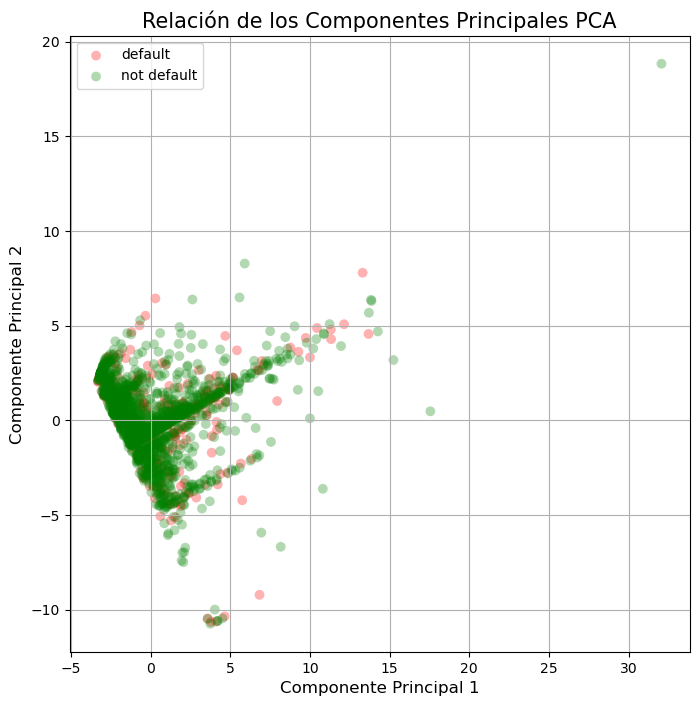

In [42]:
#Se grafican los componentes principales para ver su correlacion 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("Componente Principal 1", fontsize = 12)
ax.set_ylabel("Componente Principal 2", fontsize = 12)

ax.set_title('Relación de los Componentes Principales PCA', fontsize = 15)

targets = ['default','not default']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = CreditFinalDf['Y'] == target
    ax.scatter(CreditFinalDf.loc[indicesToKeep,"comp_princ_1"]
               , CreditFinalDf.loc[indicesToKeep,"comp_princ_2"]
               , c = color
               , s = 50
               ,alpha=0.3
               ,edgecolors='none')
ax.legend(targets)
ax.grid()

<h3 Style = "color:#264301"> 9.5.Analisis de la Varianza Post PCA. </h3>

<p>La varianza nos va a indicar cuanto porcentaje de la data quedo disponible para el proceso de ML los resultados se suman y es el porcentaje disponible </p>

In [43]:
# codigo calculo varianza 

pca.explained_variance_ratio_  

#esta varianza es de 0,56% esto indica que la data que quedo para poder hacer el modelo es muy poca y por ende no va hacer eficiente
#Esto quiere decir que en este set de datos no es implementar un algorimo de regresion lineal simple o multiple 

array([0.35319482, 0.21421836])

<h3 Style = "color:#264301"> 10.Analisis para corroborar la NO implementación del Modelo de Regresión Lineal. </h3>

<p>Se ejecutan dos graficos de correlación para demostrar que no existe una correlación entre las variables </p>

In [44]:
#convierto a dummies la variable Y para poder graficarla
CreditFinalDf = pd.get_dummies(CreditFinalDf)
CreditFinalDf.head(5)

,comp_princ_1,comp_princ_2,Y_default,Y_not default
0,-1.839202,-0.699981,0,0
1,-0.740259,-1.969482,1,0
2,-0.827897,-0.964408,1,0
3,-0.225029,-0.828303,0,1
4,-0.770643,-0.016472,0,1


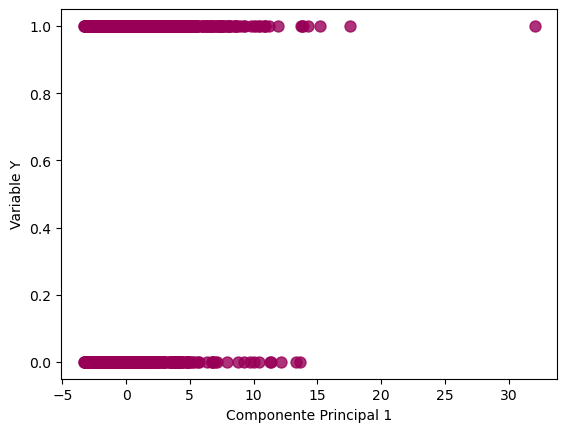

In [45]:
# Grafico de Dispersión para observar la relación de los PCA con la variable Y
plt.scatter(CreditFinalDf["comp_princ_1"],CreditFinalDf["Y_not default"], c="#980058", s=250, alpha=0.8, marker=".", label="luck")
plt.xlabel("Componente Principal 1")
plt.ylabel("Variable Y")

plt.title ="Figura: Correlación entre variables PCA"
plt.show()

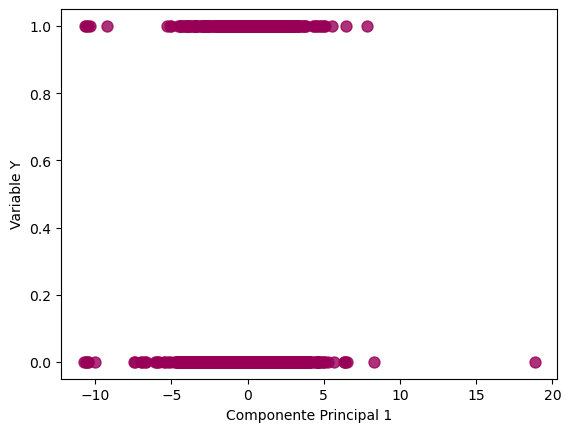

In [46]:
# Grafico de Dispersión para observar la relación de los PCA con la variable Y
plt.scatter(CreditFinalDf["comp_princ_2"],CreditFinalDf["Y_default"], c="#980058", s=250, alpha=0.8, marker=".", label="luck")
plt.xlabel("Componente Principal 1")
plt.ylabel("Variable Y")

plt.title ="Figura: Correlación entre variables PCA"
plt.show()

<p>Como se puede observar no existe una correlación entre las variables por lo tanto no se puede aplicar un modelo de regresión lineal en este DF por lo tanto con una regresion simple o multiple en esta data no se puede determinar si un cliente puede obtar por un prestamo mendiante la aplicacion de Machine learning.</p>


                                                                                                